<a href="https://colab.research.google.com/github/andyleva/natural-language-processing/blob/lesson06/nlp_hw_lesson_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### КУРС "Введение в обработку естественного языка"

Тема “Классификация текста”
Взять ноутбук colab_text_classification_part1.ipynb который разбирали на занятии и
добавить пункты которые мы пропустили
1. Посмотрите на токены если будут мусорные добавьте их в стоп слова и обучите
заново
2. Проверьте изменилось ли качество при лемматизации/и без неё
3. Замените все токены которые принадлежат сущностям на их тег. Проверьте
изменилось ли качество после этого

In [ ]:
pip install stop_words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32910 sha256=6b7b49259151400e727f949c982cea414fc2945e1063d777b257b646f556d547
  Stored in directory: /root/.cache/pip/wheels/eb/03/0d/3bd31c983789aeb0b4d5e2ca48590288d9db1586cf5f225062
Successfully built stop-words


In [ ]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import re
import pandas, numpy, textblob, string
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving corpus (2) to corpus (2)


In [ ]:
# Загружаем данные
data = open('corpus (2)').read()
labels, texts = [], []
for i, line in enumerate(data.split("\n")):
    content = line.split()
    labels.append(content[0])
    texts.append(" ".join(content[1:]))

# создаем df
train_df = pd.DataFrame()
train_df['text'] = texts
train_df['label'] = labels

In [ ]:
train_df.head(3)

,text,label
0,Stuning even for the non-gamer: This sound tra...,__label__2
1,The best soundtrack ever to anything.: I'm rea...,__label__2
2,Amazing!: This soundtrack is my favorite music...,__label__2


In [ ]:
stopwords = set(get_stop_words("ru"))
morpher = MorphAnalyzer()


In [ ]:
def removeApostrophe(review):
    phrase = re.sub(r"won't", "will not", review)
    phrase = re.sub(r"can\'t", "can not", review)
    phrase = re.sub(r"n\'t", " not", review)
    phrase = re.sub(r"\'re", " are", review)
    phrase = re.sub(r"\'s", " is", review)
    phrase = re.sub(r"\'d", " would", review)
    phrase = re.sub(r"\'ll", " will", review)
    phrase = re.sub(r"\'t", " not", review)
    phrase = re.sub(r"\'ve", " have", review)
    phrase = re.sub(r"\'m", " am", review)
    return phrase

def removeApostropheFixed(review):
    phrase = re.sub(r"won't", "willnot", review)
    phrase = re.sub(r"can\'t", "cannot", review)
    phrase = re.sub(r"\snot", "not", review)
    phrase = re.sub(r"n\'t", "not", review)
    phrase = re.sub(r"\'re", " are", review)
    phrase = re.sub(r"\'s", " is", review)
    phrase = re.sub(r"\'d", " would", review)
    phrase = re.sub(r"\'ll", " will", review)
    phrase = re.sub(r"\'t", " not", review)
    phrase = re.sub(r"\'ve", " have", review)
    phrase = re.sub(r"\'m", " am", review)
    return phrase

def removeSpecialChars(review):
     return re.sub('[^a-zA-Z]', ' ', review)
    
def doCleaningFixed(review):
    review = removeApostropheFixed(review)
    review = removeSpecialChars(review) 
    review = review.lower()  
    review = review.split() #Tokenization
    lmtzr = WordNetLemmatizer()
    review = [lmtzr.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = " ".join(review)    
    return review

def doTextCleaning(review):
    review = removeApostrophe(review)
    review = removeSpecialChars(review) 
    review = review.lower()  
    review = review.split() #Tokenization
    lmtzr = WordNetLemmatizer()
    review = [lmtzr.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = " ".join(review)    
    return review

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
train_df['textOld'] = train_df['text'].apply(doTextCleaning)
train_df['textNew'] = train_df['text'].apply(doCleaningFixed)

In [ ]:
from nltk import tokenize as tknz
def tweet_token_filtered(text):
    stop_words = stopwords.words("english")
    words = tknz.word_tokenize(text)
    without_stop_words = [word for word in words if not word in stop_words]
    return without_stop_words

def tweet_lemmatize(text):
    lemmatizer=WordNetLemmatizer()   
    text_stemmer = " ".join([lemmatizer.lemmatize(w, wordnet.VERB) for w in text])
    return text_stemmer

In [ ]:
from nltk.corpus import wordnet
train_df['text_token_filtered']= train_df['textOld'].apply(tweet_token_filtered)
train_df['textt_lemmatize']= train_df['text_token_filtered'].apply(tweet_lemmatize)

In [ ]:
train_df.head(3)

,text,label,textOld,textNew,text_token_filtered,textt_lemmatize
0,Stuning even for the non-gamer: This sound tra...,__label__2,stuning even non gamer sound track beautiful p...,stuning even non gamer sound track beautiful p...,"[stuning, even, non, gamer, sound, track, beau...",stun even non gamer sound track beautiful pain...
1,The best soundtrack ever to anything.: I'm rea...,__label__2,best soundtrack ever anything reading lot revi...,best soundtrack ever anything reading lot revi...,"[best, soundtrack, ever, anything, reading, lo...",best soundtrack ever anything read lot review ...
2,Amazing!: This soundtrack is my favorite music...,__label__2,amazing soundtrack favorite music time hand in...,amazing soundtrack favorite music time hand in...,"[amazing, soundtrack, favorite, music, time, h...",amaze soundtrack favorite music time hand inte...


In [ ]:
# подсчет тэгов частей речи в предложении
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

In [ ]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    classifier.fit(feature_vector_train, label)
    
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

In [ ]:
def iteration(train_df, txt_column='textOld'):

    train_x, valid_x, train_y, valid_y = model_selection.train_test_split(train_df[txt_column], train_df['label'])

    # labelEncode целевую переменную
    encoder = preprocessing.LabelEncoder()
    train_y = encoder.fit_transform(train_y)
    valid_y = encoder.fit_transform(valid_y)

    # word level tf-idf
    tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
    tfidf_vect.fit(train_df[txt_column])
    xtrain_tfidf =  tfidf_vect.transform(train_x)
    xvalid_tfidf =  tfidf_vect.transform(valid_x)

    # ngram level tf-idf 
    tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
    tfidf_vect_ngram.fit(train_df[txt_column])
    xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
    xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

    # characters level tf-idf
    tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
    tfidf_vect_ngram_chars.fit(train_df[txt_column])
    xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
    xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 


    train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split()))
    train_df['char_count'] = train_df['text'].apply(len)
    train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split()))
    train_df['word_density'] = train_df['char_count'] / (train_df['word_count']+1)
    train_df['punctuation_count'] = train_df['text'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
    train_df['title_word_count'] = train_df['text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
    train_df['upper_case_word_count'] = train_df['text'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

    pos_family = {
        'noun' : ['NN','NNS','NNP','NNPS'],
        'pron' : ['PRP','PRP$','WP','WP$'],
        'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
        'adj' :  ['JJ','JJR','JJS'],
        'adv' : ['RB','RBR','RBS','WRB']
    }

    train_df['noun_count'] = train_df['text'].apply(lambda x: check_pos_tag(x, 'noun'))
    train_df['verb_count'] = train_df['text'].apply(lambda x: check_pos_tag(x, 'verb'))
    train_df['adj_count'] = train_df['text'].apply(lambda x: check_pos_tag(x, 'adj'))
    train_df['adv_count'] = train_df['text'].apply(lambda x: check_pos_tag(x, 'adv'))
    train_df['pron_count'] = train_df['text'].apply(lambda x: check_pos_tag(x, 'pron'))


    count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
    count_vect.fit(train_df[txt_column])

    xtrain_count =  count_vect.transform(train_x)
    xvalid_count =  count_vect.transform(valid_x)


    # Naive Bayes на Count Vectors
    accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
    print("NB, Count Vectors: ", accuracy)

    # Naive Bayes на Word Level TF IDF Vectors
    accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
    print("NB, WordLevel TF-IDF: ", accuracy)

    # Naive Bayes на Ngram Level TF IDF Vectors
    accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
    print("NB, N-Gram Vectors: ", accuracy)

    # Naive Bayes на Character Level TF IDF Vectors
    accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
    print("NB, CharLevel Vectors: ", accuracy)

    classifier = naive_bayes.MultinomialNB()
    classifier.fit(xtrain_tfidf_ngram_chars, train_y)    
    predictions = classifier.predict(xvalid_tfidf_ngram_chars)

    sid = SentimentIntensityAnalyzer()
    sent_analysis = train_df['text'].apply(sid.polarity_scores)

In [ ]:
train_df2 = train_df.copy()

In [ ]:
iteration(train_df2, 'textOld')

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:546: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn(


NB, Count Vectors:  0.512
NB, WordLevel TF-IDF:  0.5032
NB, N-Gram Vectors:  0.4932
NB, CharLevel Vectors:  0.512


In [ ]:
iteration(train_df2, 'textt_lemmatize')

NB, Count Vectors:  0.476
NB, WordLevel TF-IDF:  0.4812
NB, N-Gram Vectors:  0.482
NB, CharLevel Vectors:  0.4888


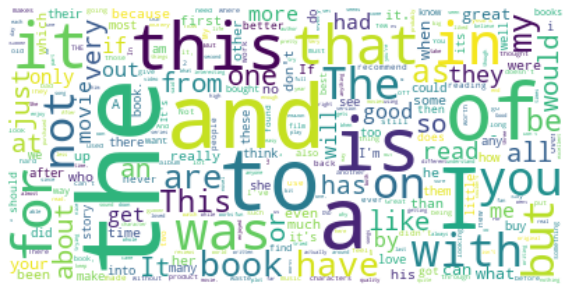

In [ ]:
import collections

words = []
for line in train_df['text']: 
    line_words = line.split()
    words.extend(line_words)

wordfreq = collections.Counter(words)
wordcloud = WordCloud(
 background_color='white',
 max_words=2000,
 stopwords=stopwords
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

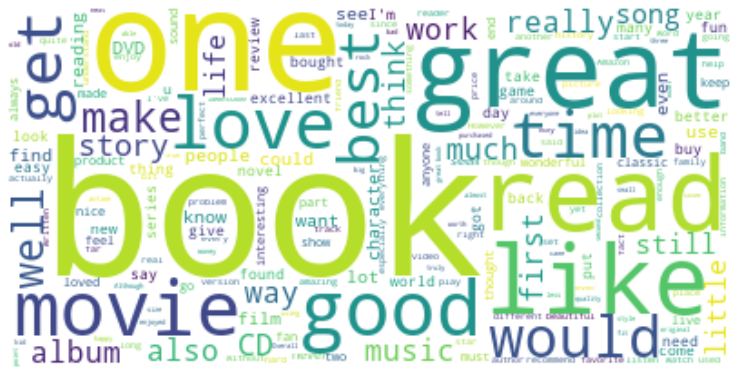

In [ ]:
pos_words = []
for line in train_df['text'][train_df['label']=='__label__2']: 
    line_words = line.split()
    pos_words.extend(line_words)
pos_words = ' '.join(pos_words)

stopwords_set = set(stopwords.words('english'))
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=50000,
    stopwords = stopwords_set
   ).generate(pos_words)
plt.figure(figsize=(13,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

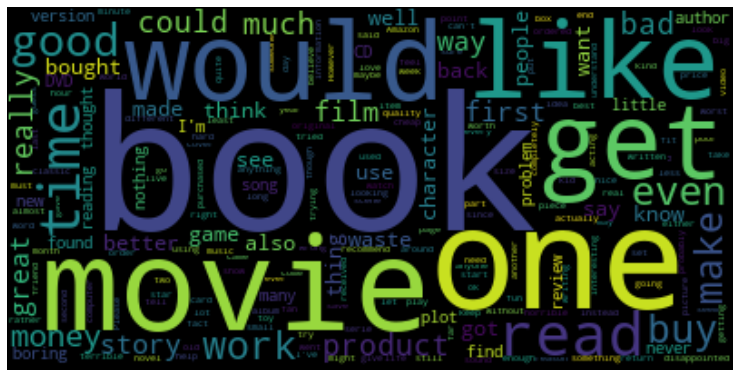

In [ ]:
negative = [r for r in train_df['text'][train_df['label']=='__label__1']]
neg = ''.join(negative)
# draw a Word Cloud with word frequencies
stopwords_set = set(stopwords.words('english'))
wordcloud = WordCloud(
    background_color='black',
    max_words=50000,
    stopwords = stopwords_set
   ).generate(neg)
plt.figure(figsize=(13,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()